# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `assets/Employee_Movie_Choices.txt`.

A second file, `assets/Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

# Tarefa 1 - Criando e Manipulando Grafos

Oito empregados em uma pequena empresa, tiveram que escolher 3 filmes que eles mais gostariam de assistir para a próxima noite de filmes da empresa. As escolhas estão armazenadas no arquivo  `assets/Employee_Movie_Choices.txt`.  

Um segundo arquivo, `assets/Employee_Relationships.txt`, tem os dados das relações entre os diversos empregados.

A pontuação da relação vai de `-100` (inimigos) até `+100` (melhores amigos). O valor zero indica que os dois empregados não iteragem entre si ou são indiferentes.

Ambos os arquivos são delimitados pelo caracter Tab.

In [103]:
import networkx as nx
import pandas as pd
import numpy as np


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    #%matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, width=weights);
    else:
        nx.draw_networkx(G, pos,);

### Question 1

Using NetworkX, load in the bipartite graph from `assets/Employee_Movie_Choices.txt` and return that graph.

*This function should return a bipartite networkx graph with 19 nodes and 24 edges*

### Questão 1

Usando NetworkX, carregue um grafo bipartido de `assets/Employee_Movie_Choices.txt` e retorne esse graho.

*Essa função deve retornar um grfo bipartido do networkx com 19 nós e 24 arestas.*

In [104]:
def answer_one():

    # YOUR CODE HERE
    
    # load data as a pandas dataframe
    G_df = pd.read_csv('assets/Employee_Movie_Choices.txt', sep='\t')#, header=None, names=['Employee','Movie'])
    
    # create a graph using the dataframe as a list of edges between nodes. 
    # Columns '#Employee' and 'Movie' are the nodes
    B = nx.from_pandas_edgelist(G_df, '#Employee', 'Movie')
    
    # divide graph in 2 sets (bipartite). One with the employees and another with the movies
    B.add_nodes_from(G_df['#Employee'], bipartite=0)
    B.add_nodes_from(G_df['Movie'], bipartite=1)
    
    return B

In [105]:
assert type(answer_one()) == nx.Graph , "Your return type should be a Graph object"

In [106]:
# teste function
G = answer_one()

# list nodes generated
print("Data type:",type(G))
print("nodes:",G.number_of_nodes())
print("Edges:",G.number_of_edges())
print("\nNodes list:")
print(*list(G.nodes(data=True)), sep="\n")

Data type: <class 'networkx.classes.graph.Graph'>
nodes: 19
Edges: 24

Nodes list:
('Andy', {'bipartite': 0})
('Anaconda', {'bipartite': 1})
('Mean Girls', {'bipartite': 1})
('The Matrix', {'bipartite': 1})
('Claude', {'bipartite': 0})
('Monty Python and the Holy Grail', {'bipartite': 1})
('Snakes on a Plane', {'bipartite': 1})
('Frida', {'bipartite': 0})
('The Shawshank Redemption', {'bipartite': 1})
('The Social Network', {'bipartite': 1})
('Georgia', {'bipartite': 0})
('Joan', {'bipartite': 0})
('Forrest Gump', {'bipartite': 1})
('Kung Fu Panda', {'bipartite': 1})
('Lee', {'bipartite': 0})
('Pablo', {'bipartite': 0})
('The Dark Knight', {'bipartite': 1})
('Vincent', {'bipartite': 0})
('The Godfather', {'bipartite': 1})


In [107]:
# list edges generated
print("Edges list:")
print(*list(G.edges(data=True)), sep="\n")

Edges list:
('Andy', 'Anaconda', {})
('Andy', 'Mean Girls', {})
('Andy', 'The Matrix', {})
('Anaconda', 'Claude', {})
('Anaconda', 'Georgia', {})
('Mean Girls', 'Joan', {})
('Mean Girls', 'Lee', {})
('The Matrix', 'Frida', {})
('The Matrix', 'Pablo', {})
('Claude', 'Monty Python and the Holy Grail', {})
('Claude', 'Snakes on a Plane', {})
('Monty Python and the Holy Grail', 'Georgia', {})
('Snakes on a Plane', 'Georgia', {})
('Frida', 'The Shawshank Redemption', {})
('Frida', 'The Social Network', {})
('The Shawshank Redemption', 'Pablo', {})
('The Shawshank Redemption', 'Vincent', {})
('The Social Network', 'Vincent', {})
('Joan', 'Forrest Gump', {})
('Joan', 'Kung Fu Panda', {})
('Forrest Gump', 'Lee', {})
('Kung Fu Panda', 'Lee', {})
('Pablo', 'The Dark Knight', {})
('Vincent', 'The Godfather', {})


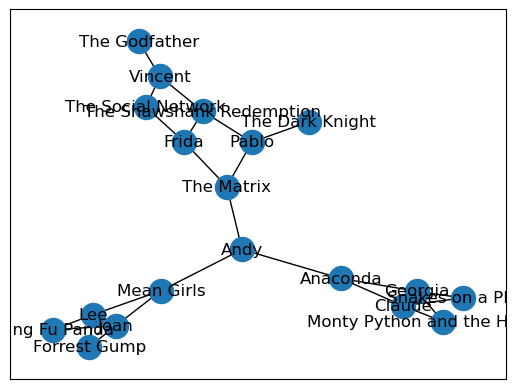

In [108]:
# plot he Graph
plot_graph(G)

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a bipartite networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

### Questão 2

Usando o Grafo da questão anterior, crie o atributo `'type'` para os nós onde os filmes the valor `'movie'` e os empregados tem o valor `'employee'` e retorne esse grafo.

*Essa função deve retonar um grafo bipartido do networkx graph com os nós com o atributo  `{'type': 'movie'}` ou `{'type': 'employee'}`*

In [109]:
def answer_two():
    
    # YOUR CODE HERE
    # create the grapf with function 1
    G = answer_one()
    
    # get the 2 sets of nodes from the bipartite graph
    bottom_nodes, top_nodes = nx.bipartite.sets(G)
    
    # add the type of node according to the set
    for n in bottom_nodes:
        G.add_node(n,type='employee')
    for n in top_nodes:
        G.add_node(n,type='movie')        
    return G

In [110]:
assert type(answer_two()) == nx.Graph , "Your return type should be a Graph object"


In [111]:
# teste function
G = answer_two()

# list nodes generated
print("Data type:",type(G))
print("nodes:",G.number_of_nodes())
print("Edges:",G.number_of_edges())
print("\nNodes list (now with types):")
print(*list(G.nodes(data=True)), sep="\n")

Data type: <class 'networkx.classes.graph.Graph'>
nodes: 19
Edges: 24

Nodes list (now with types):
('Andy', {'bipartite': 0, 'type': 'employee'})
('Anaconda', {'bipartite': 1, 'type': 'movie'})
('Mean Girls', {'bipartite': 1, 'type': 'movie'})
('The Matrix', {'bipartite': 1, 'type': 'movie'})
('Claude', {'bipartite': 0, 'type': 'employee'})
('Monty Python and the Holy Grail', {'bipartite': 1, 'type': 'movie'})
('Snakes on a Plane', {'bipartite': 1, 'type': 'movie'})
('Frida', {'bipartite': 0, 'type': 'employee'})
('The Shawshank Redemption', {'bipartite': 1, 'type': 'movie'})
('The Social Network', {'bipartite': 1, 'type': 'movie'})
('Georgia', {'bipartite': 0, 'type': 'employee'})
('Joan', {'bipartite': 0, 'type': 'employee'})
('Forrest Gump', {'bipartite': 1, 'type': 'movie'})
('Kung Fu Panda', {'bipartite': 1, 'type': 'movie'})
('Lee', {'bipartite': 0, 'type': 'employee'})
('Pablo', {'bipartite': 0, 'type': 'employee'})
('The Dark Knight', {'bipartite': 1, 'type': 'movie'})
('Vince

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

### Questão 3

Encontre a projeção ponderada do grafo obtido de  `answer_two` que indique quantos filmes em comum cada par de empregados assitiu.

*Essa função deve retornar uma projeção poderada de um grafo.*

In [112]:
def answer_three():
    # YOUR CODE HERE
    
    # there is already a networkx function to create the graph
    # just enter the grapf: answer_two()
    # and the list of nodes:employees (defined on the first code box)
    P = nx.bipartite.weighted_projected_graph(answer_two(), employees)
    
    return P

EdgeDataView([('Andy', 'Frida', {'weight': 1}), ('Andy', 'Lee', {'weight': 1}), ('Andy', 'Claude', {'weight': 1}), ('Andy', 'Pablo', {'weight': 1}), ('Andy', 'Joan', {'weight': 1}), ('Andy', 'Georgia', {'weight': 1}), ('Frida', 'Pablo', {'weight': 2}), ('Frida', 'Vincent', {'weight': 2}), ('Lee', 'Joan', {'weight': 3}), ('Claude', 'Georgia', {'weight': 3}), ('Pablo', 'Vincent', {'weight': 1})])

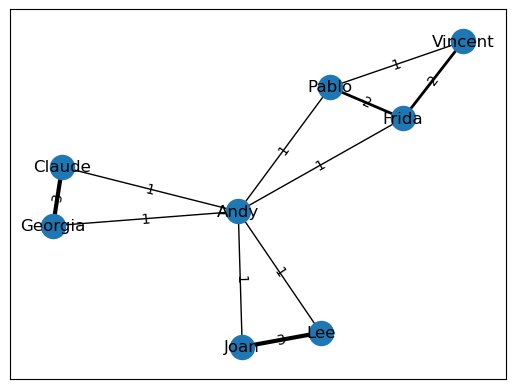

In [113]:
G = answer_three()
plot_graph(G, weight_name="weight")
G.edges(data = True)

In [114]:
assert type(answer_three()) == nx.Graph , "Your return type should be a Graph object"

Number of nodes: 11
Number of edges: 16


[('The Dark Knight', 'The Matrix', {'weight': 1}),
 ('The Dark Knight', 'The Shawshank Redemption', {'weight': 1}),
 ('The Matrix', 'The Shawshank Redemption', {'weight': 2}),
 ('The Matrix', 'Anaconda', {'weight': 1}),
 ('The Matrix', 'Mean Girls', {'weight': 1}),
 ('The Matrix', 'The Social Network', {'weight': 1}),
 ('The Shawshank Redemption', 'The Godfather', {'weight': 1}),
 ('The Shawshank Redemption', 'The Social Network', {'weight': 2}),
 ('Snakes on a Plane', 'Anaconda', {'weight': 2}),
 ('Snakes on a Plane', 'Monty Python and the Holy Grail', {'weight': 2}),
 ('Kung Fu Panda', 'Forrest Gump', {'weight': 2}),
 ('Kung Fu Panda', 'Mean Girls', {'weight': 2}),
 ('Anaconda', 'Mean Girls', {'weight': 1}),
 ('Anaconda', 'Monty Python and the Holy Grail', {'weight': 2}),
 ('Mean Girls', 'Forrest Gump', {'weight': 2}),
 ('The Social Network', 'The Godfather', {'weight': 1})]

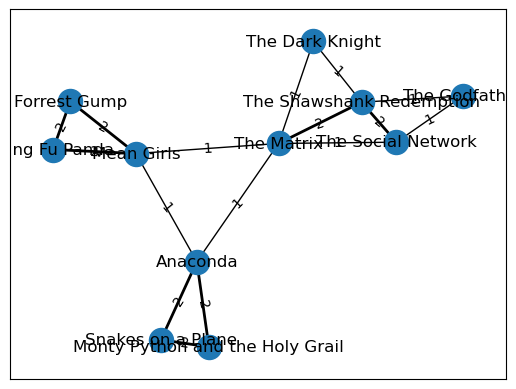

In [115]:
# Whe can do the same but weighted by movies
# pairs of movies and the number of times both were watched

P = nx.bipartite.weighted_projected_graph(answer_two(), movies)
plot_graph(P, weight_name="weight")
print("Number of nodes:",P.number_of_nodes())
print("Number of edges:",P.number_of_edges())
list(P.edges(data = True))

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the pearson correlation between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

### Questão 4

Suponha que você queira descobrir se pessoas com um indice de relacionamento alto também gostam dos mesmos tipos de filme.

Encontre o Coeficiente de correlação de Pearson entre o indice de relacionamento entre os empregados e o número de filmes que els tem em comum. Se dois empregados não tem filmes em comum, o valor deve ser zero e não estar faltando e deve ser incluido no cáculo da correlação.

*Essa função deve retornar um número tipo float*

In [116]:
def answer_four():
    
    # YOUR CODE HERE
    # read teh erelationship file as a dataframe
    G_df = pd.read_csv('assets/Employee_Relationships.txt', sep='\t')
    # give name to the columns
    G_df.columns = ['Employee1','Employee2', 'relation']
    
    # Create a graph from the employees reations
    B = nx.from_pandas_edgelist(G_df,'Employee1','Employee2','relation')
    
    # get the weighted projection grpaf from question 3
    A = answer_three()
    
    # join the 2 graphs
    C = nx.compose(A,B)
    
    # convert the grapf to a dataframe
    df = nx.to_pandas_edgelist(C)
    # replace missing values with zero
    df.replace(np.nan, 0, inplace=True)
    
    # retunr the correlation
    return df['weight'].corr(df['relation'])


In [117]:
ans_four = answer_four()

### Checking the solution step by step

In [118]:
# correlation:
print('Correlation: ', answer_four())

Correlation:  0.7883962221733474


In [119]:
G_df = pd.read_csv('assets/Employee_Relationships.txt', sep='\t')
G_df.columns = ['Employee1','Employee2', 'relation']
G_df.head()

,Employee1,Employee2,relation
0,Andy,Frida,20
1,Andy,Georgia,-10
2,Andy,Joan,30
3,Andy,Lee,-10
4,Andy,Pablo,-10


Number of nodes: 8
Number of edges: 27


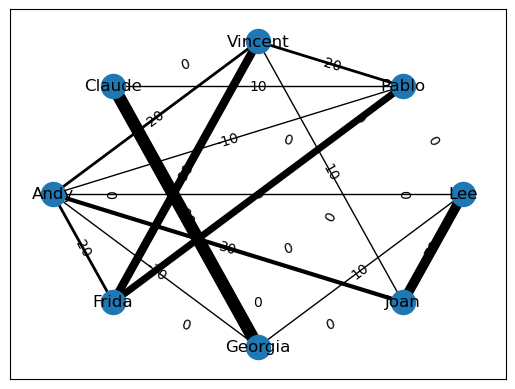

In [120]:


B = nx.from_pandas_edgelist(G_df,'Employee1','Employee2','relation')
pos = nx.shell_layout(B)
labels = nx.get_edge_attributes(B,"relation")


nx.draw_networkx_edge_labels(B,pos,edge_labels=labels)
# had to divide the relation by 10 or the graph is impossible to read becasue of thickness of lines
nx.draw_networkx(B,pos ,width= [int(B[u][v]["relation"]/10) for u,v in B.edges()])
print("Number of nodes:",B.number_of_nodes())
print("Number of edges:",B.number_of_edges())

Number of nodes: 8
Number of edges: 11


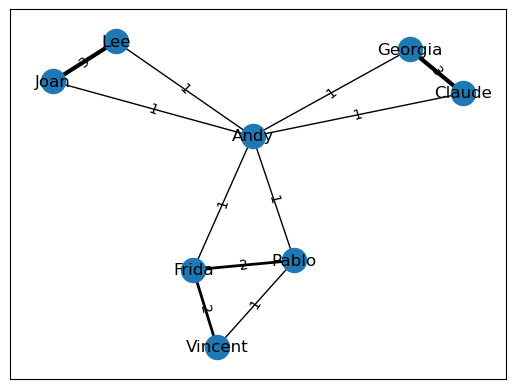

In [121]:
A = answer_three()
plot_graph(A,weight_name = 'weight')
print("Number of nodes:",A.number_of_nodes())
print("Number of edges:",A.number_of_edges())

Number of nodes: 8
Number of edges: 28


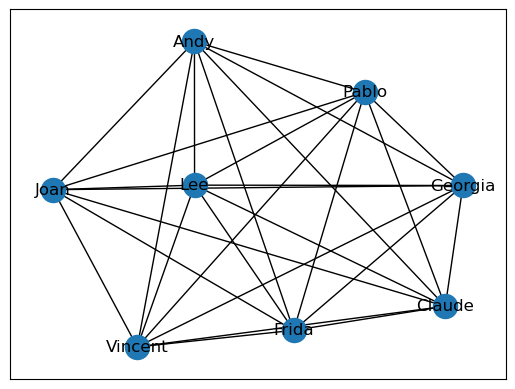

In [122]:
C = nx.compose(A,B)
plot_graph(C)
print("Number of nodes:",C.number_of_nodes())
print("Number of edges:",C.number_of_edges())

In [123]:
print('nodes:', *list(C.nodes(data = True)), sep="\n")

nodes:
('Andy', {'bipartite': 0, 'type': 'employee'})
('Frida', {'bipartite': 0, 'type': 'employee'})
('Lee', {'bipartite': 0, 'type': 'employee'})
('Claude', {'bipartite': 0, 'type': 'employee'})
('Pablo', {'bipartite': 0, 'type': 'employee'})
('Joan', {'bipartite': 0, 'type': 'employee'})
('Vincent', {'bipartite': 0, 'type': 'employee'})
('Georgia', {'bipartite': 0, 'type': 'employee'})


In [124]:
print('\nEdges: ',*list(C.edges(data = True)), sep="\n")


Edges: 
('Andy', 'Frida', {'weight': 1, 'relation': 20})
('Andy', 'Lee', {'weight': 1, 'relation': -10})
('Andy', 'Claude', {'weight': 1})
('Andy', 'Pablo', {'weight': 1, 'relation': -10})
('Andy', 'Joan', {'weight': 1, 'relation': 30})
('Andy', 'Georgia', {'weight': 1, 'relation': -10})
('Andy', 'Vincent', {'relation': 20})
('Frida', 'Pablo', {'weight': 2, 'relation': 50})
('Frida', 'Vincent', {'weight': 2, 'relation': 60})
('Frida', 'Claude', {'relation': 0})
('Frida', 'Georgia', {'relation': 0})
('Frida', 'Joan', {'relation': 0})
('Frida', 'Lee', {'relation': 0})
('Lee', 'Joan', {'weight': 3, 'relation': 70})
('Lee', 'Georgia', {'relation': 10})
('Lee', 'Claude', {'relation': 0})
('Lee', 'Pablo', {'relation': 0})
('Lee', 'Vincent', {'relation': 0})
('Claude', 'Georgia', {'weight': 3, 'relation': 90})
('Claude', 'Joan', {'relation': 0})
('Claude', 'Pablo', {'relation': 10})
('Claude', 'Vincent', {'relation': 0})
('Pablo', 'Vincent', {'weight': 1, 'relation': -20})
('Pablo', 'Georgia